In [1]:
from model_tbyt_2 import GPT, GPTConfig
import torch
import os
itr_num = 20000
#block_size = 8
#vocab_size = 128
block_size = 32
vocab_size = 128
device = 'cpu'
config = GPTConfig(block_size=block_size, vocab_size=vocab_size)
model = GPT(config)
model_state_dict = torch.load(os.path.join(os.getcwd(), f'saved_models/tbyt_1head_2_itr:{itr_num}_checkpoint_old.pt'), map_location=device)['model']
#model_state_dict = torch.load('./saved_models/tbyt_b64_v2048_embd16_1head_2_itr:20000_checkpoint.pt', map_location=device)['model']
model.load_state_dict(model_state_dict)
model.to(device=device)
first_directions = {}

Im in GPT instructor
i initialized n-layers
im in block instructor
i initialized everying in block
im in block instructor
i initialized everying in block
i initialized transformer
I have initialized all the variables in GPT instructor


In [2]:
batch_size = 64
#test_1_seq = torch.cat((torch.arange(110, 30, -5) , torch.arange(127, 111, -1)), dim=0) 
#print(test_1_seq)
def get_batch(changing_num, changing_index=-1, initial_sequence=None, batch_size=batch_size):
   def cat_sorted_tensor(x):
      if initial_sequence is not None:
         x = initial_sequence
      else:
         x, _ = torch.sort(x, descending=True)
      if changing_num != -1:
         if changing_index == -1:
            x[0] = changing_num
         else:
            x[changing_index] = changing_num
      #x = torch.cat((torch.tensor([100]).repeat(16), torch.tensor([1]).repeat(16)))
      #x = torch.tensor([100,100,100,100,1,1,1,1])
      vals, _ = torch.sort(x)
      #vals2, _ = torch.sort(x, descending=True)
      #print('vals are ', vals)
      return torch.cat((x, torch.tensor([vocab_size]), vals), dim=0)
   #x = torch.stack([cat_sorted_tensor(torch.randperm(vocab_size)[:block_size]) for _ in range(batch_size)])
   x = torch.stack([cat_sorted_tensor(torch.randperm(vocab_size)[:32]) for _ in range(batch_size)])
   return x

x shape is  torch.Size([64, 65, 64])
S is 


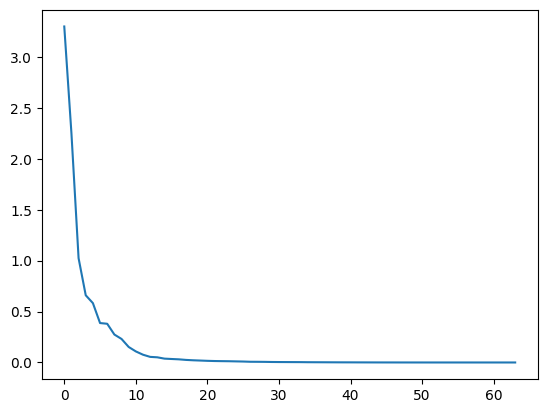

x shape is  torch.Size([64, 65, 64])
norm without residual  tensor(39.3130, grad_fn=<LinalgVectorNormBackward0>)
residual part norm  tensor(29.6633, grad_fn=<LinalgVectorNormBackward0>)
x shape is  torch.Size([64, 65, 64])
S is 


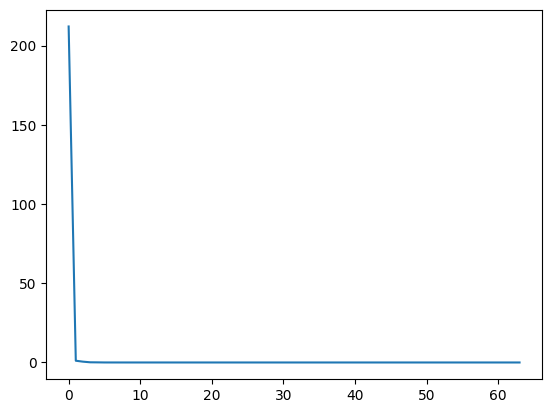

x shape is  torch.Size([64, 65, 64])
norm without residual  tensor(1782.7816, grad_fn=<LinalgVectorNormBackward0>)
residual part norm  tensor(6292.3306, grad_fn=<LinalgVectorNormBackward0>)
x shape is  torch.Size([64, 65, 64])
im here!!!  torch.Size([64, 1, 65, 65])
Vh shape is  torch.Size([64, 64])
x shape is  torch.Size([1, 65, 64])
S is 


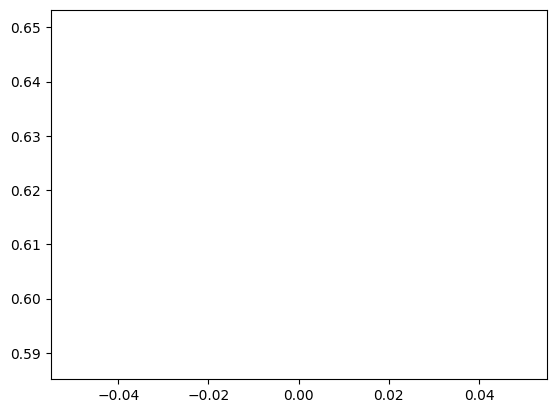

x shape is  torch.Size([1, 65, 64])
norm without residual  tensor(4.7621, grad_fn=<LinalgVectorNormBackward0>)
residual part norm  tensor(3.7329, grad_fn=<LinalgVectorNormBackward0>)
x shape is  torch.Size([1, 65, 64])
S is 


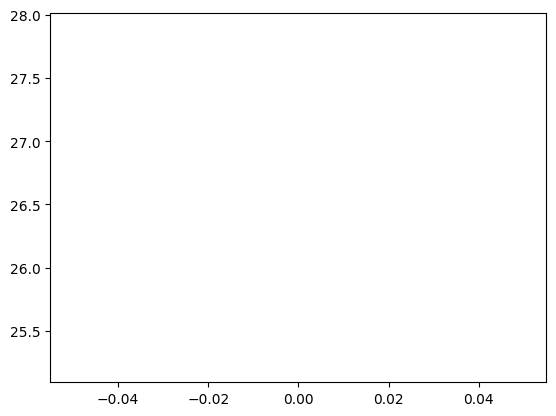

x shape is  torch.Size([1, 65, 64])
norm without residual  tensor(221.2726, grad_fn=<LinalgVectorNormBackward0>)
residual part norm  tensor(740.3734, grad_fn=<LinalgVectorNormBackward0>)
x shape is  torch.Size([1, 65, 64])
im here!!!  torch.Size([1, 1, 65, 65])
idx is: tensor([[122, 121, 116, 106,  99,  94,  92,  88,  80,  79,  73,  70,  64,  63,
          60,  55,  51,  47,  46,  45,  42,  39,  37,  24,  23,  19,  13,  10,
           8,   7,   4,   3, 128,   3,   4,   7,   8,  10,  13,  19,  23,  24,
          37,  39,  42,  45,  46,  47,  51,  55,  60,  63,  64,  70,  73,  79,
          80,  88,  92,  94,  99, 106, 116, 121, 122]])
result is: tensor([[123,   6, 119, 105,   4,   4, 120,  86,  82,  79,  78,  78,   3,  67,
          65,  59,  53,  32,  47,  49,  32,  33,  34,  17,  14,  16,  11,   9,
           8,   7,   4,   3, 102, 106, 106, 107, 108, 108, 108, 108, 109, 108,
         108, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109,
         109, 109, 109, 109, 10

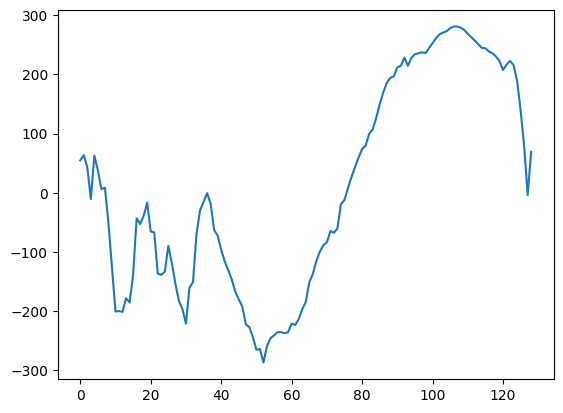

In [ ]:

##just testing the output

idx = get_batch(-1)
position = 50
model.set_position(position)
## this is the group batch one
logits, loss = model(idx)

Vh = model.Vhs[0]
print('Vh shape is ', Vh.shape)


batch_size = 1
idx = get_batch(-1, batch_size=1)

## this is the single batch one
logits, loss = model(idx)
print(f'idx is: {idx}')
import matplotlib.pyplot as plt
plt.plot(logits[0,63,:].detach().numpy())
#print('this is ',logits[0,39,:] )
#print('this is ',logits[0,57,:] )
print(f'result is: {torch.argmax(logits, dim=-1)}')






#print('numbers of position 34 are ')
#import matplotlib.pyplot as plt


#plt.figure(2)
#plt.vlines(range(65), -5, 25, color='orange', linestyles='dashed')
#plt.plot(idx[:,34])

#plt.show()

#x, _ = torch.sort(x[0])
#x = torch.unsqueeze(x, dim=0)


x shape is  torch.Size([1, 65, 64])
x shape is  torch.Size([1, 65, 64])
S is 


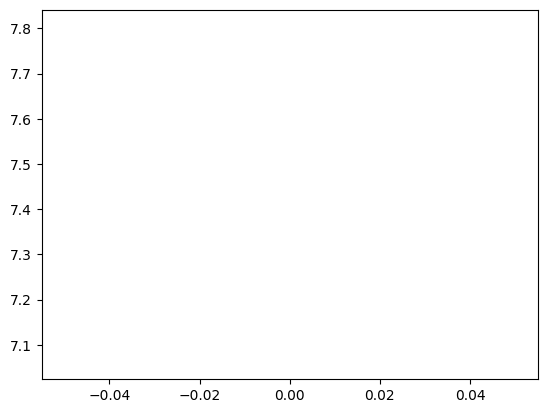

x shape is  torch.Size([1, 65, 64])
norm without residual  tensor(296.2356, grad_fn=<LinalgVectorNormBackward0>)
residual part norm  tensor(1107.0543, grad_fn=<LinalgVectorNormBackward0>)
x shape is  torch.Size([1, 65, 64])
new result is: tensor([[124, 124, 124, 124, 123, 125, 125, 122, 122, 122,   1, 120,   4,  11,
           3,   3,   3,  67,  12,  12,  12,  12,  49,  32,  32,  31,  20,  15,
           9,   8,   6,   4,   1,   4,   8,  11,  23,  23,  38,  43,  45,  53,
          62,  64,  65,  66,  69,  76,  77,  82,  82,  90,  92,  96,  98, 102,
         106, 108, 112, 113, 114, 117, 118, 124, 124]])


In [4]:
## try the second layer with the signal from a different number
#idx = torch.tensor([128] * 16 + [vocab_size] + [1] * 16).unsqueeze(0)
#idx = get_batch(-1, initial_sequence=idx[0,:32], batch_size=1)
res_stream_1_without_residual = model.transformer.h[0].c_attn(model.transformer.h[0].ln_1(model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device))))
vec = res_stream_1_without_residual[0,position,:]
res_stream_1_without_residual[0,position - 1,:] = vec
x = res_stream_1_without_residual + model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device))
res_stream_1 = model.transformer.h[0].c_fc(model.transformer.h[0].ln_2(x)) + x
f_logits = model.lm_head(model.transformer.h[1](res_stream_1))
print(f'new result is: {torch.argmax(f_logits, dim=-1)}')

x shape is  torch.Size([1, 65, 64])
vec dim  torch.Size([64])  first_direction shape  torch.Size([64])
x shape is  torch.Size([1, 65, 64])
vec dim  torch.Size([64])  first_direction shape  torch.Size([64])
x shape is  torch.Size([1, 65, 64])
vec dim  torch.Size([64])  first_direction shape  torch.Size([64])
x shape is  torch.Size([1, 65, 64])
vec dim  torch.Size([64])  first_direction shape  torch.Size([64])
x shape is  torch.Size([1, 65, 64])
vec dim  torch.Size([64])  first_direction shape  torch.Size([64])
x shape is  torch.Size([1, 65, 64])
vec dim  torch.Size([64])  first_direction shape  torch.Size([64])
x shape is  torch.Size([1, 65, 64])
vec dim  torch.Size([64])  first_direction shape  torch.Size([64])
x shape is  torch.Size([1, 65, 64])
vec dim  torch.Size([64])  first_direction shape  torch.Size([64])
x shape is  torch.Size([1, 65, 64])
vec dim  torch.Size([64])  first_direction shape  torch.Size([64])
x shape is  torch.Size([1, 65, 64])
vec dim  torch.Size([64])  first_dire

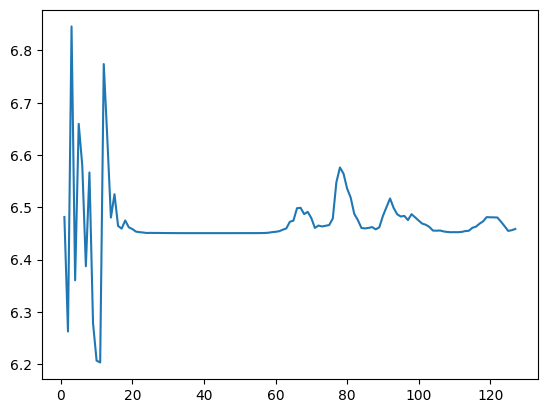

torch.Size([64])


In [5]:
direction = 10
first_direction = Vh[direction,:]
first_directions[position] = first_direction
vals = []
idx = torch.tensor([128] * 16 + [vocab_size] + [1] * 16).unsqueeze(0)
idx = get_batch(-1, initial_sequence=idx[0,:32], batch_size=1)
## actuallly position 55 can only change from 85 to 93
for changing_num in range(1, 128):
    idx = get_batch(changing_num, initial_sequence=idx[0,:32], batch_size=1)
    ## obtaining output of first layer without residual
    res_stream_1_without_residual = model.transformer.h[0].c_attn(model.transformer.h[0].ln_1(model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device))))
    x = res_stream_1_without_residual + model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device))
    res_stream_1 = model.transformer.h[0].c_fc(model.transformer.h[0].ln_2(x))
    vec = res_stream_1[0,position,:]
    print('vec dim ', vec.shape, ' first_direction shape ', first_direction.shape)
    vals.append(torch.dot(vec, first_direction).item())


print('projection of non-residual part after first layer in position 34' \
' in direction of the first singular vector as a function of first number of the seuqnece:')
print('class of vals is ', type(vals))
import numpy as np
import matplotlib.pyplot as plt
plt.plot(range(1, 128), vals)
plt.show()

##projectinig onto U

print(first_direction.shape)
#logits, loss = model.without_pos_embd(idx)
#print('loss is ', loss.item())


torch.Size([129])

In [77]:
first_directions[40].shape

torch.Size([129])

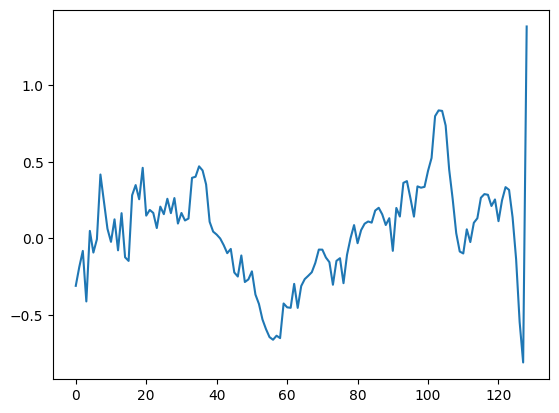

In [87]:
## see the interaction of the first principal direction in the second layer weights
import matplotlib.pyplot as plt
qweights2, kweights2, vweights2 = model.transformer.h[1].c_attn.c_attn.weight.split(model.config.n_embd, dim=0)
scores = model.transformer.h[0].ln_1(model.transformer.wte.weight)  @ vweights.t() @ model.transformer.h[0].c_attn.c_proj.weight.t() @ first_directions[position]
scores2 = model.transformer.wpe.weight @ qweights2.t() @ kweights2 @ model.transformer.wpe.weight.t()
U, S, Vh = torch.linalg.svd(scores2)
#plt.plot(S.detach().numpy()[3:])
plt.plot(scores.detach().numpy())
#print('Vh dim is ', Vh.shape)
#plt.plot(scores.detach().numpy())
#plt.colorbar()
plt.show()

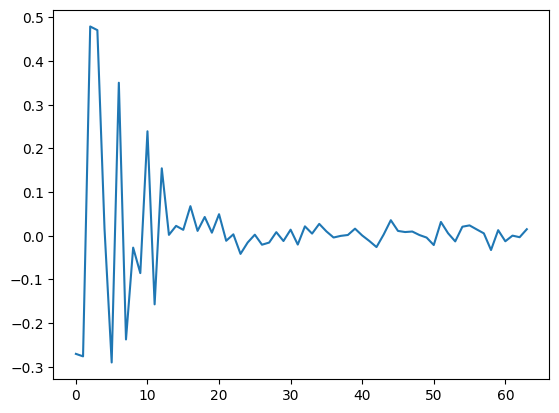

In [52]:
#torch.dot(first_directions[35], first_directions[45])
qweights, kweights, vweights = model.transformer.h[0].c_attn.c_attn.weight.split(model.config.n_embd, dim=0)
U, S, V = torch.linalg.svd((model.transformer.h[0].c_attn.c_proj.weight @ vweights))
import matplotlib.pyplot as plt
#plt.plot(S.detach().numpy())
uweightsSVD_1 = U[:,0]
vweightsSVD_1 = V[0,:]
#print(torch.dot(V, first_directions[35]))
#print(S[10])
plt.plot((U.t() @ first_directions[40]).detach().numpy())

In [8]:
import torch
U, D, Vh = torch.linalg.svd(torch.tensor([[1.0, 1.0], [1.0, 0.0]]))
print('U is ', U) 
print('D is ',torch.diag(D))
print('Vh is ', Vh)
print('product is ', U @ torch.diag(D) @ Vh)

U is  tensor([[-0.8507, -0.5257],
        [-0.5257,  0.8507]])
D is  tensor([[1.6180, 0.0000],
        [0.0000, 0.6180]])
Vh is  tensor([[-0.8507, -0.5257],
        [ 0.5257, -0.8507]])
product is  tensor([[1.0000e+00, 1.0000e+00],
        [1.0000e+00, 8.9407e-08]])
